In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [3]:
def last_two_characters(s):
    return s[-2:]

## Case study and review

In [4]:
# Size is in square miles
# Motor vehicle/walk are % of commuters who commute that way
# Tech workers is the number of people who work in a computer or math occupation
# Insured is % who have health insurance
# Broadband is % who have a computer with broadband internet access in their home
# Gini index measures income inequality (0-1, larger values mean higher inequality)
# College / High school / No high school are % of adults with that level of education

cities_full = Table.read_table('urban_areas_2017.csv')
cities_full

Urban area,Size,Latitude,Longitude,Motor vehicle,Walk,Tech workers,Insured,Broadband,Median rent,Gini index,Population,College,High school,No high school,Has rapid transit
"Aberdeen--Bel Air South--Bel Air North, MD",134.925,39.509,-76.3034,0.90997,0.0105471,5232,0.962115,0.894681,1234,0.4273,217354,0.367897,0.559833,0.0722698,Yes
"Abilene, TX",55.114,32.4285,-99.7472,0.888628,0.0317286,567,0.856491,0.753254,822,0.456,115066,0.245741,0.620045,0.134214,No
"Akron, OH",332.108,41.0662,-81.4919,0.922375,0.0109048,7004,0.94434,0.826694,787,0.4559,564172,0.289675,0.626027,0.0842975,No
"Albany, GA",71.922,31.5911,-84.1688,0.902176,0.0229261,448,0.854641,0.767485,689,0.4706,90661,0.232903,0.64165,0.125447,No
"Albany--Schenectady, NY",302.018,42.7464,-73.8005,0.865017,0.0354182,11849,0.967418,0.857791,967,0.4574,598679,0.386266,0.531278,0.0824562,Yes
"Albuquerque, NM",254.013,35.1413,-106.629,0.896003,0.0206119,10032,0.931853,0.84338,863,0.4636,760553,0.343562,0.562311,0.0941263,No
"Alexandria, LA",65.892,31.2606,-92.5061,0.88766,0.0249954,236,0.923722,0.768583,784,0.5041,82641,0.229798,0.599386,0.170817,No
"Allentown, PA--NJ",350.355,40.6511,-75.4422,0.910435,0.0197552,8224,0.940044,0.830979,981,0.4549,684888,0.286305,0.606923,0.106772,Yes
"Alton, IL--MO",55.588,38.8977,-90.1283,0.92942,0.010636,944,0.943771,0.786948,744,0.4297,80117,0.210653,0.684375,0.104973,No
"Altoona, PA",37.459,40.4853,-78.3939,0.895422,0.0390898,775,0.963821,0.802753,696,0.4637,75793,0.216314,0.68426,0.0994253,No


In [5]:
cities = cities_full.select('Urban area', 'Motor vehicle', 'Tech workers', 
                            'Broadband', 'Median rent', 'Gini index', 
                            'Population', 'College', 'Has rapid transit')
cities

Urban area,Motor vehicle,Tech workers,Broadband,Median rent,Gini index,Population,College,Has rapid transit
"Aberdeen--Bel Air South--Bel Air North, MD",0.90997,5232,0.894681,1234,0.4273,217354,0.367897,Yes
"Abilene, TX",0.888628,567,0.753254,822,0.456,115066,0.245741,No
"Akron, OH",0.922375,7004,0.826694,787,0.4559,564172,0.289675,No
"Albany, GA",0.902176,448,0.767485,689,0.4706,90661,0.232903,No
"Albany--Schenectady, NY",0.865017,11849,0.857791,967,0.4574,598679,0.386266,Yes
"Albuquerque, NM",0.896003,10032,0.84338,863,0.4636,760553,0.343562,No
"Alexandria, LA",0.88766,236,0.768583,784,0.5041,82641,0.229798,No
"Allentown, PA--NJ",0.910435,8224,0.830979,981,0.4549,684888,0.286305,Yes
"Alton, IL--MO",0.92942,944,0.786948,744,0.4297,80117,0.210653,No
"Altoona, PA",0.895422,775,0.802753,696,0.4637,75793,0.216314,No


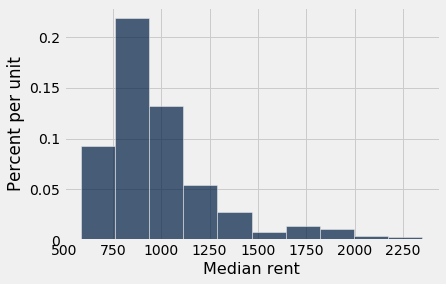

In [6]:
cities.hist('Median rent')

In [7]:
cities.sort('Median rent', descending=True).show(20)

Urban area,Motor vehicle,Tech workers,Broadband,Median rent,Gini index,Population,College,Has rapid transit
"Kailua (Honolulu County)--Kaneohe, HI",0.832936,1041,0.865833,2351,0.4076,108149,0.393659,No
"San Jose, CA",0.844482,115374,0.92014,2246,0.4585,1802777,0.528692,Yes
"Concord, CA",0.757052,26647,0.926732,2093,0.4598,666478,0.597663,Yes
"Thousand Oaks, CA",0.862366,3857,0.935278,2091,0.4676,223914,0.511123,No
"Mission Viejo--Lake Forest--San Clemente, CA",0.859928,13402,0.93401,2076,0.4544,608431,0.511873,Yes
"Camarillo, CA",0.885212,1459,0.921876,1951,0.4585,72381,0.45791,No
"Simi Valley, CA",0.900668,2560,0.913698,1935,0.3977,128671,0.331999,Yes
"Petaluma, CA",0.840327,772,0.887191,1869,0.4315,67224,0.37808,No
"Livermore, CA",0.889819,2687,0.914794,1868,0.4195,89119,0.470148,No
"Santa Barbara, CA",0.745219,5000,0.874221,1836,0.4899,206275,0.508578,No


In [8]:
last_two_characters('Berkeley, CA')

'CA'

In [9]:
cities = cities.with_column(
    'State',
    cities.apply(last_two_characters, 'Urban area'))
cities

Urban area,Motor vehicle,Tech workers,Broadband,Median rent,Gini index,Population,College,Has rapid transit,State
"Aberdeen--Bel Air South--Bel Air North, MD",0.90997,5232,0.894681,1234,0.4273,217354,0.367897,Yes,MD
"Abilene, TX",0.888628,567,0.753254,822,0.456,115066,0.245741,No,TX
"Akron, OH",0.922375,7004,0.826694,787,0.4559,564172,0.289675,No,OH
"Albany, GA",0.902176,448,0.767485,689,0.4706,90661,0.232903,No,GA
"Albany--Schenectady, NY",0.865017,11849,0.857791,967,0.4574,598679,0.386266,Yes,NY
"Albuquerque, NM",0.896003,10032,0.84338,863,0.4636,760553,0.343562,No,NM
"Alexandria, LA",0.88766,236,0.768583,784,0.5041,82641,0.229798,No,LA
"Allentown, PA--NJ",0.910435,8224,0.830979,981,0.4549,684888,0.286305,Yes,NJ
"Alton, IL--MO",0.92942,944,0.786948,744,0.4297,80117,0.210653,No,MO
"Altoona, PA",0.895422,775,0.802753,696,0.4637,75793,0.216314,No,PA


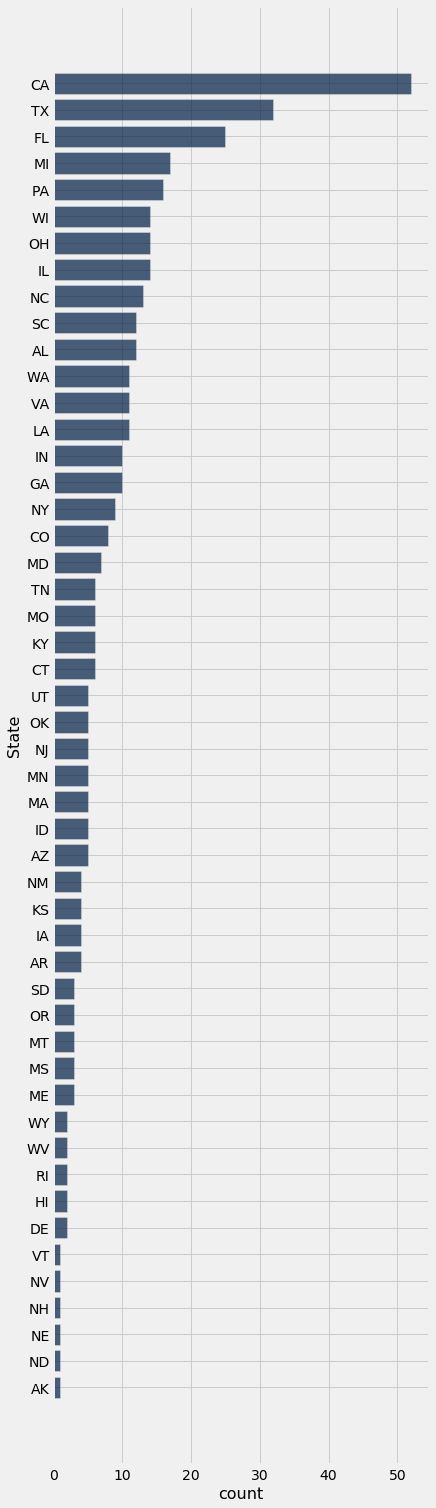

In [10]:
cities.group('State').sort(1, descending=True).barh('State')

In [11]:
cities.sort('Tech workers', descending=True)

Urban area,Motor vehicle,Tech workers,Broadband,Median rent,Gini index,Population,College,Has rapid transit,State
"New York--Newark, NY--NJ--CT",0.546397,305950,0.841015,1382,0.5164,19094455,0.397902,Yes,CT
"Washington, DC--VA--MD",0.72871,224151,0.905354,1664,0.4482,5042681,0.534676,Yes,MD
"Los Angeles--Long Beach--Anaheim, CA",0.850585,156696,0.859414,1463,0.4917,12670761,0.333647,Yes,CA
"Chicago, IL--IN",0.762648,148494,0.838096,1087,0.4869,8667303,0.385877,Yes,IN
"San Francisco--Oakland, CA",0.628258,134373,0.891656,1833,0.4877,3556206,0.496403,Yes,CA
"Seattle, WA",0.769798,133462,0.909606,1451,0.4568,3436084,0.43809,Yes,WA
"Dallas--Fort Worth--Arlington, TX",0.907108,121776,0.869565,1084,0.467,5807934,0.344616,Yes,TX
"Boston, MA--NH--RI",0.720641,118575,0.872654,1410,0.485,4433253,0.478439,Yes,RI
"San Jose, CA",0.844482,115374,0.92014,2246,0.4585,1802777,0.528692,Yes,CA
"Atlanta, GA",0.854747,113121,0.878861,1141,0.4734,5057220,0.406496,Yes,GA


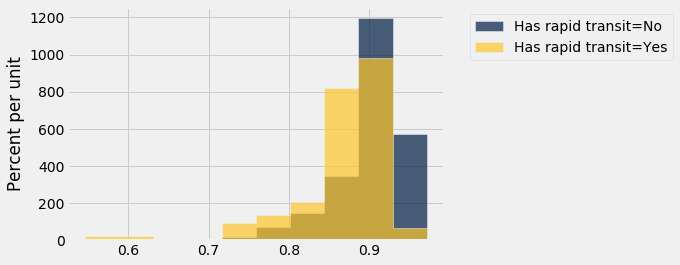

In [12]:
cities.hist('Motor vehicle', group='Has rapid transit')

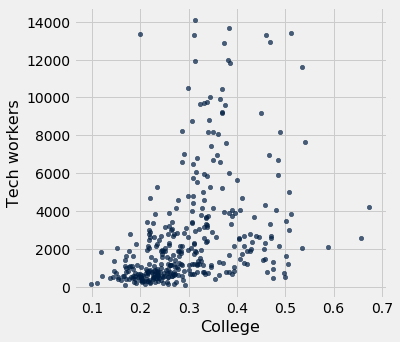

In [13]:
cities.where('Tech workers', are.below(15000)).scatter('College', 'Tech workers')

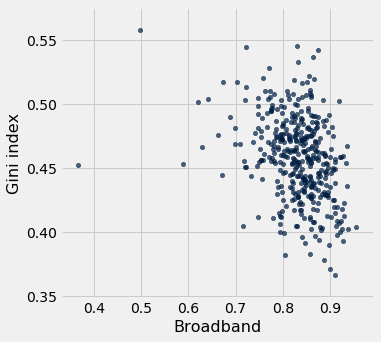

In [14]:
cities.scatter('Broadband', 'Gini index')

In [15]:
cities.where('Broadband', are.below(.5))

Urban area,Motor vehicle,Tech workers,Broadband,Median rent,Gini index,Population,College,Has rapid transit,State
"Brownsville, TX",0.950049,407,0.367413,696,0.4522,230836,0.189757,No,TX
"Valdosta, GA",0.959018,1180,0.497197,770,0.5583,80123,0.30645,No,GA
